In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Check the row for the "description" column that contains NaN

In [5]:
df[df.description.isna()]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


### Replace all NaN in the dataset with empty string

In [6]:
df = df.replace(np.nan,'')

### Combine text columns into a single column called 'text'.
Columns chosen in this case include title, department, company_profile, description, benefits, employment_type, required_education.

In [7]:
df['text'] = df['title'] + '' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education']
df['text'] = df['text'].str.replace(u'\xa0',u' ')

### Wordcloud
Run a wordcloud to understand the words with the highest frequency in the new "text" column.

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

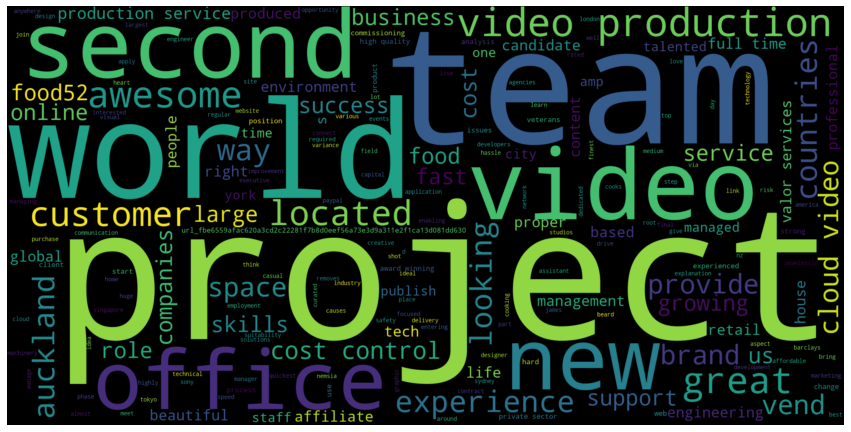

In [19]:
text = df['text'].str.lower().values
stopwords = set(STOPWORDS)
stopwords.update(["re", "work", "including", 'will','working','need', 'want', 'looking for', 'every'])
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    max_words = 200,
    stopwords = stopwords).generate(str(text))

fig = plt.figure(figsize = (15, 15))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.show()

# Modelling with Naive Bayes

### Split the training and test data
For this model the training:testing data is split in an 80:20 fashion.

In [10]:
Xtrain , Xtest , ytrain, ytest = train_test_split(df.text, df.fraudulent, test_size = 0.2, random_state = 0)

### Vectorise the text
The step is performed to run Naive Bayes model. Text preprocessing of making all words lowercase and removing stop words is done here within the code.

In [11]:
cv = CountVectorizer(lowercase = True, stop_words = 'english', min_df = 1, max_df = 1.0, max_features = None, ngram_range=(1,1))
Xtrain = cv.fit_transform(Xtrain)

### Run the Naive Bayes model

In [12]:
NB_classifier = MultinomialNB()
NB_classifier.fit(Xtrain, ytrain)
Xtest = cv.transform(Xtest)
ypred = NB_classifier.predict(Xtest)

### Evaluation the model's performance using several metrics

In [13]:
print("Accuracy score: {}".format(metrics.accuracy_score(ytest, ypred)))
print("ROC AUC score: {}".format(metrics.roc_auc_score(ytest, ypred)))
print('')
print(metrics.classification_report(ytest, ypred))
print('Confusion matrix:')
print(metrics.confusion_matrix(ytest, ypred))

Accuracy score: 0.9804250559284117
ROC AUC score: 0.8492894090151399

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3423
           1       0.81      0.71      0.76       153

    accuracy                           0.98      3576
   macro avg       0.90      0.85      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion matrix:
[[3398   25]
 [  45  108]]
